## Predicting Cardiovascular  disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has cardiovascular disease based on their medical attributes.

#### 1. Problem Definition
In a statement,
The problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they are suffering from cardiovascular disease or not.

#### 2. Data
All of the dataset values were collected at the moment of medical examination.

#### 3. Evaluation
Evaluating a models predictions using problem-specific evaluation metrics

#### 4. Features
##### Heart Disease Data Dictionary
The following are the features we'll use to predict our target variable (cardiovascular disease or no cardiovascular disease).

1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

## Data acquisition

In [2]:
# Reading the csv files
df=pd.read_csv('cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Data Preprocessing 

In [3]:
# Display The head ==> To Check if Data is Properly Imported
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures/Columns : \n", df.columns)
print("\n\nNumber of Features/Columns : ", len(df.columns))
print("\nNumber of Rows : ",len(df))
print("\n\nData Types :\n", df.dtypes)
print("sum of duplicated values{}\n".format(df.duplicated().sum()))
print("\nContains NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal empty cells by column :\n", df.isnull().sum(),"\n\n")


Features/Columns : 
 Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


Number of Features/Columns :  13

Number of Rows :  69301


Data Types :
 id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object
sum of duplicated values0


Contains NaN/Empty cells :  False

Total empty cells by column :
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64 




In [5]:
# Check if ? is present
for col in df:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")

? in id: 0
? in age: 0
? in gender: 0
? in height: 0
? in weight: 0
? in ap_hi: 0
? in ap_lo: 0
? in cholesterol: 0
? in gluc: 0
? in smoke: 0
? in alco: 0
? in active: 0
? in cardio: 0


In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


According to the information collected:                                                              
1) No null Data                                                    
2) Object Type=0                                                        
3) Float Type= 1                                                                  
4) Int Type= 12                                                                         

In [7]:
#Lets describe the dataset
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


* According to Described Information:
From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure (ap_hi and ap_lo), are unrealistic. This suggests the presence of outliers in the data and All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode ) like weight and height are right and left skewed.


In [8]:
#lets check the correlation matrix
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


In [9]:
# Number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of id : 69301
number of unique valuse of age : 8069
number of unique valuse of gender : 2
number of unique valuse of height : 108
number of unique valuse of weight : 285
number of unique valuse of ap_hi : 153
number of unique valuse of ap_lo : 157
number of unique valuse of cholesterol : 3
number of unique valuse of gluc : 3
number of unique valuse of smoke : 2
number of unique valuse of alco : 2
number of unique valuse of active : 2
number of unique valuse of cardio : 2


In [10]:
# Calculating total and counts of all int fields
num_col = df.dtypes[df.dtypes != 'object']
for col in list(num_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------Id-------------------------
       total   percent
2047       1  0.000014
37767      1  0.000014
5015       1  0.000014
7062       1  0.000014
2964       1  0.000014
...      ...       ...
71240      1  0.000014
93767      1  0.000014
91718      1  0.000014
97861      1  0.000014
2049       1  0.000014

[69301 rows x 2 columns]


--------------------Age-------------------------
       total   percent
18236     32  0.000462
19741     32  0.000462
18253     31  0.000447
20376     31  0.000447
20442     30  0.000433
...      ...       ...
23057      1  0.000014
21605      1  0.000014
17831      1  0.000014
17230      1  0.000014
14329      1  0.000014

[8069 rows x 2 columns]


--------------------Gender-------------------------
   total   percent
1  45079  0.650481
2  24222  0.349519


--------------------Height-------------------------
     total   percent
165   5801  0.083707
160   4963  0.071615
170   4627  0.066767
168   4369  0.063044
164   3365  0.048556
..     

## Univariate  Analysis

In [11]:
# Let's find out how many of each class there
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [12]:
#num percentage in dataset
print('Percentage',df.cardio.value_counts(normalize=True))

Percentage 0    0.500411
1    0.499589
Name: cardio, dtype: float64


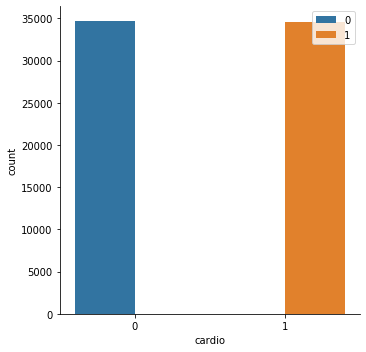

In [13]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='cardio',data=df,kind='count',hue='cardio')
plt.legend()
#here we we see data is balanced but all the classes have significant number of instances

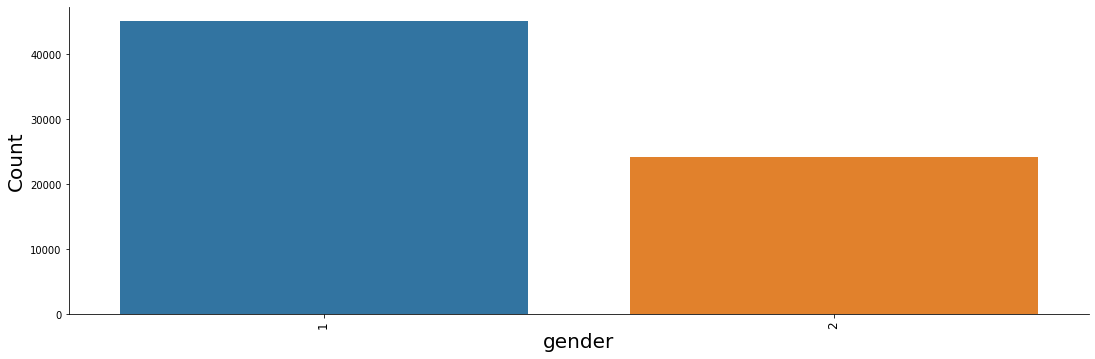

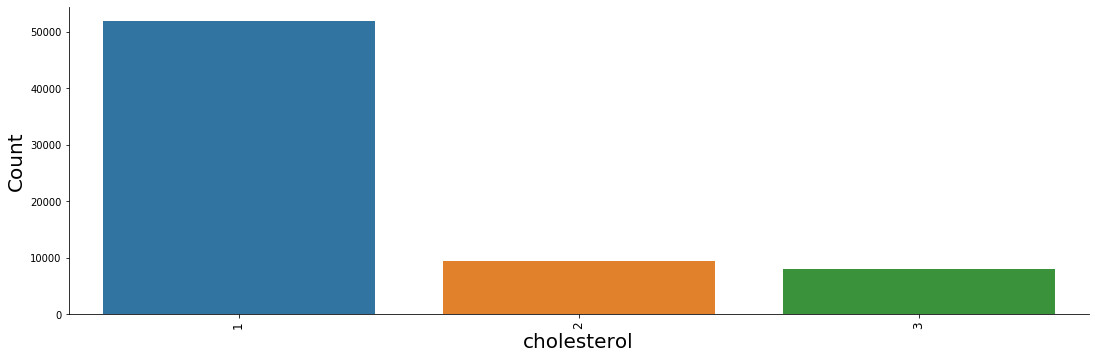

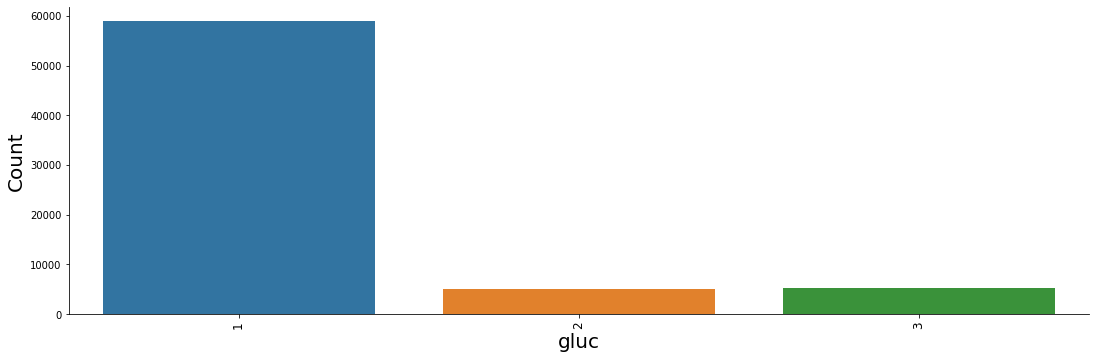

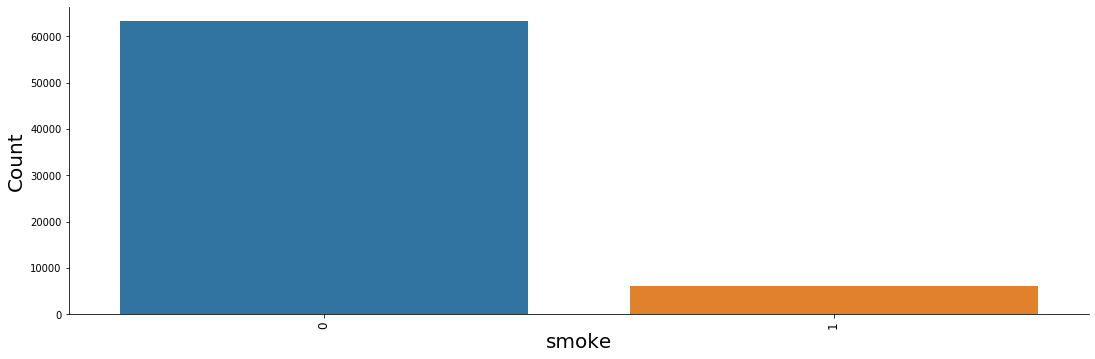

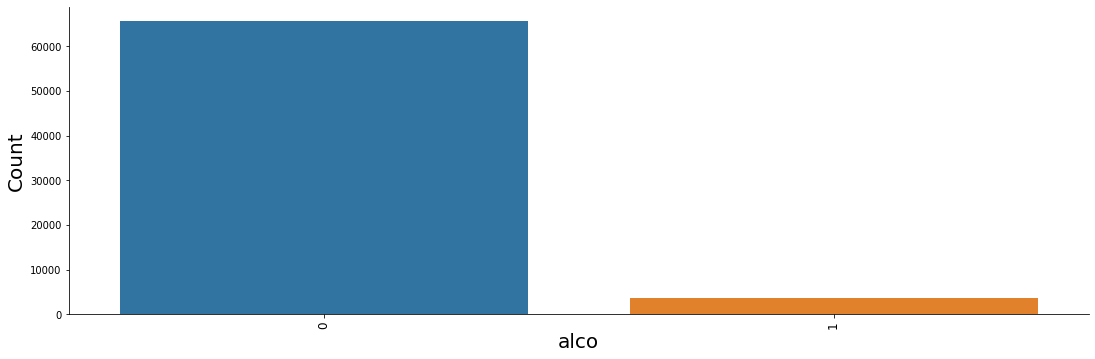

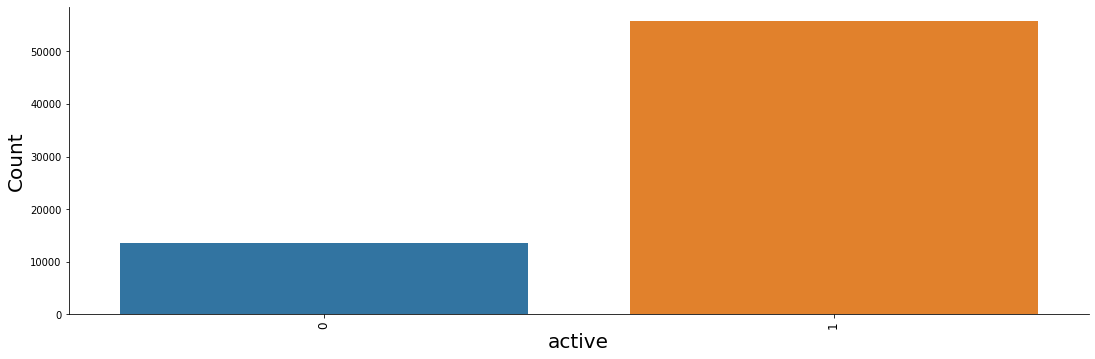

In [14]:
#Counts of each fields excludes 
for i in df.drop(['id','ap_lo','ap_hi','weight','height','age','cardio'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.xlabel(i,fontsize=20)

id                AxesSubplot(0.125,0.772143;0.168478x0.107857)
age            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
gender         AxesSubplot(0.529348,0.772143;0.168478x0.107857)
height         AxesSubplot(0.731522,0.772143;0.168478x0.107857)
weight            AxesSubplot(0.125,0.642714;0.168478x0.107857)
ap_hi          AxesSubplot(0.327174,0.642714;0.168478x0.107857)
ap_lo          AxesSubplot(0.529348,0.642714;0.168478x0.107857)
cholesterol    AxesSubplot(0.731522,0.642714;0.168478x0.107857)
gluc              AxesSubplot(0.125,0.513286;0.168478x0.107857)
smoke          AxesSubplot(0.327174,0.513286;0.168478x0.107857)
alco           AxesSubplot(0.529348,0.513286;0.168478x0.107857)
active         AxesSubplot(0.731522,0.513286;0.168478x0.107857)
cardio            AxesSubplot(0.125,0.383857;0.168478x0.107857)
dtype: object

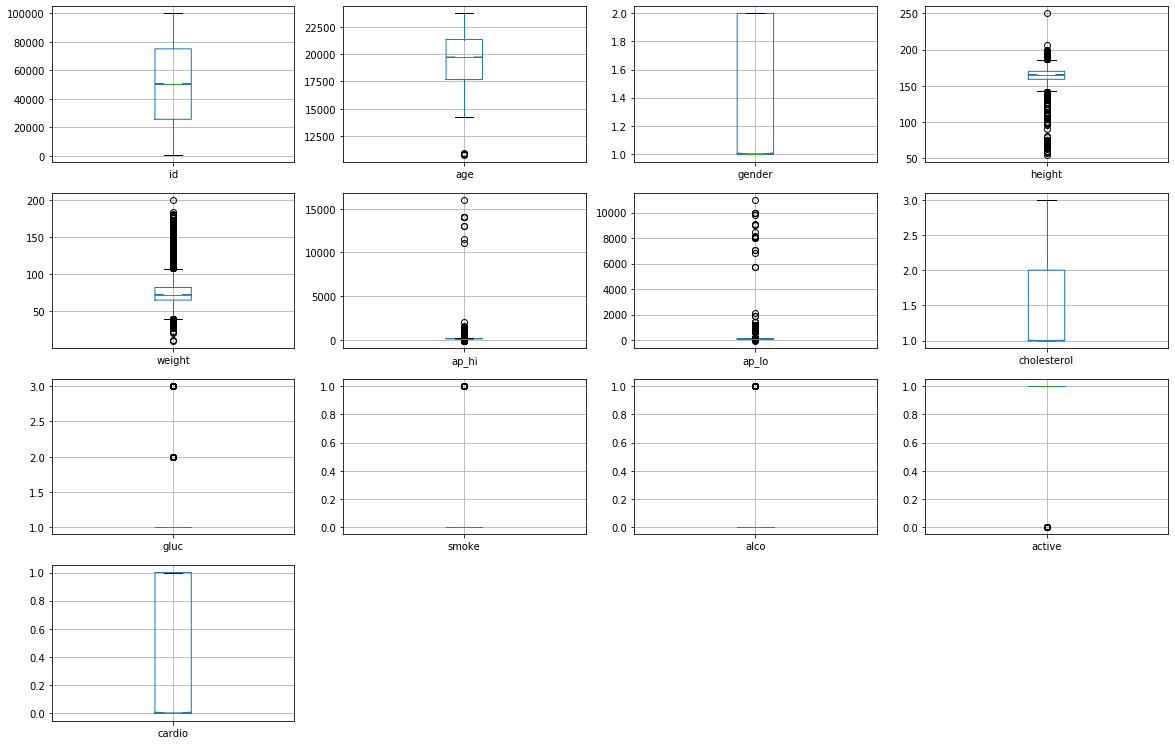

In [15]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True)

* The above boxplots confirm  that there are outliers in the dataset. There appear to be several outliers in the height ,weight,systolic and diastolic variables.

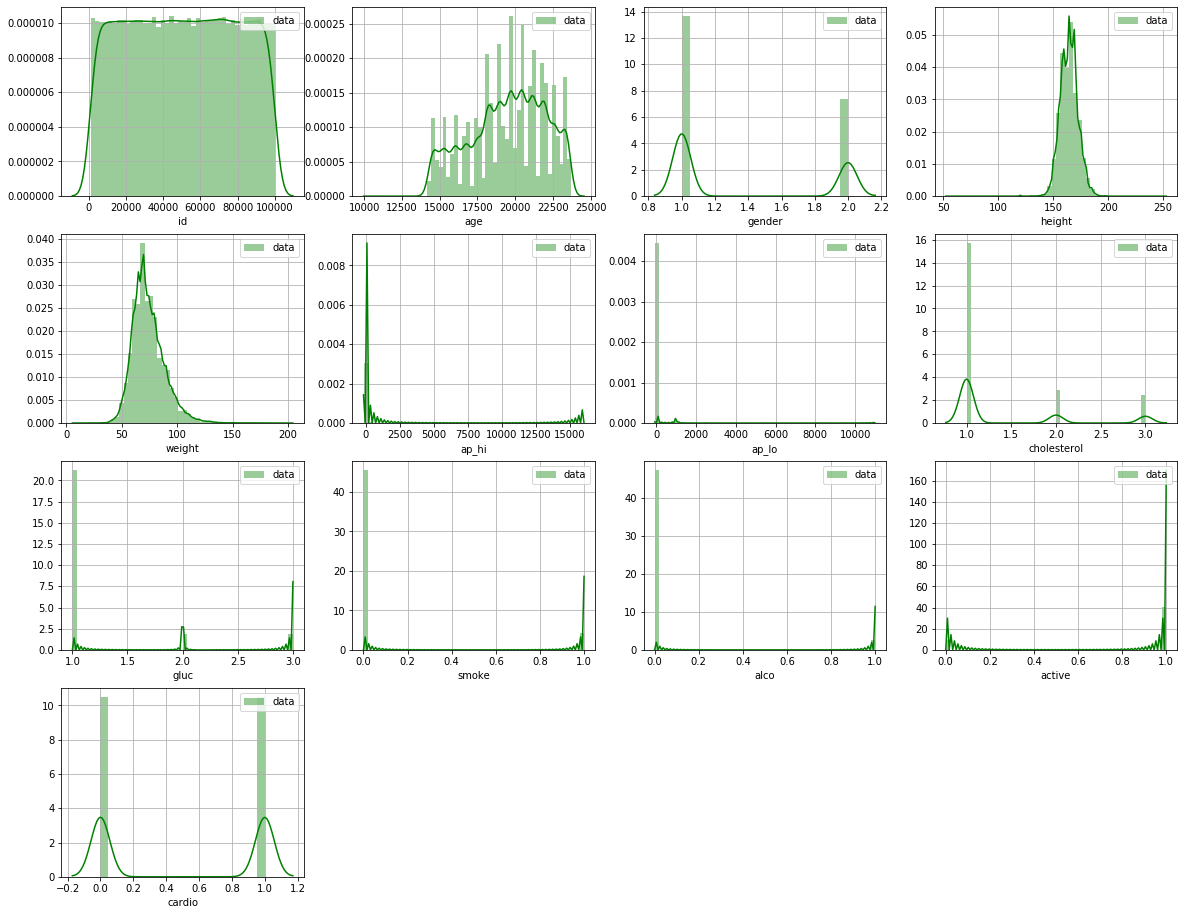

In [16]:
# Checking the Normal Distribution using distplot
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

* There appears to be some variation in age, but height and weight are almost normally distributed. However, the histograms further suggest the presence of outliers in the systolic and diastolic features.

## Bivarient  Analysis


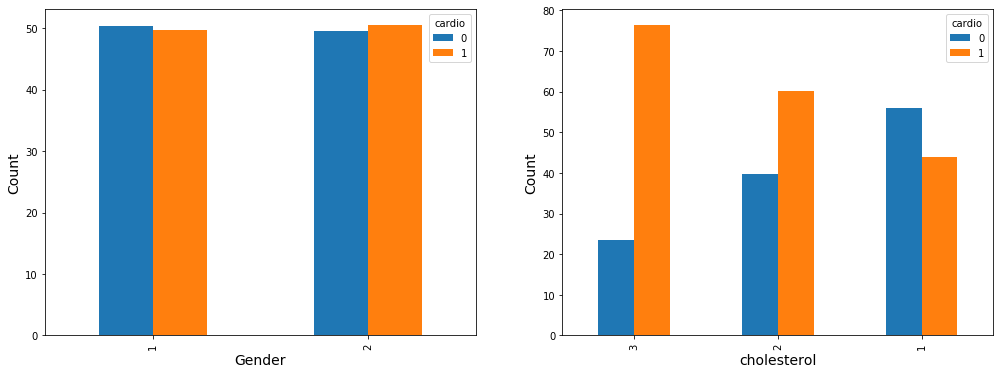

In [17]:
table_gen = pd.crosstab(df['gender'], df['cardio'])
table_cholesterol = pd.crosstab(df['cholesterol'], df['cardio'])
table_gluc = pd.crosstab(df['gluc'], df['cardio'])
table_smoke = pd.crosstab(df['smoke'], df['cardio'])
table_alco = pd.crosstab(df['alco'], df['cardio'])
table_active = pd.crosstab(df['active'], df['cardio'])


fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_gen.div(table_gen.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("Gender",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_cholesterol.div(table_cholesterol.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("cholesterol",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


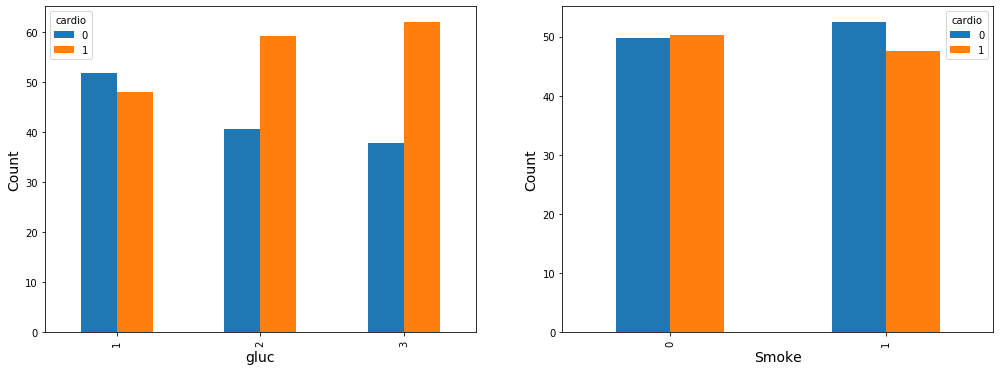

In [18]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_gluc.div(table_gluc.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("gluc",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_smoke.div(table_smoke.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Smoke",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

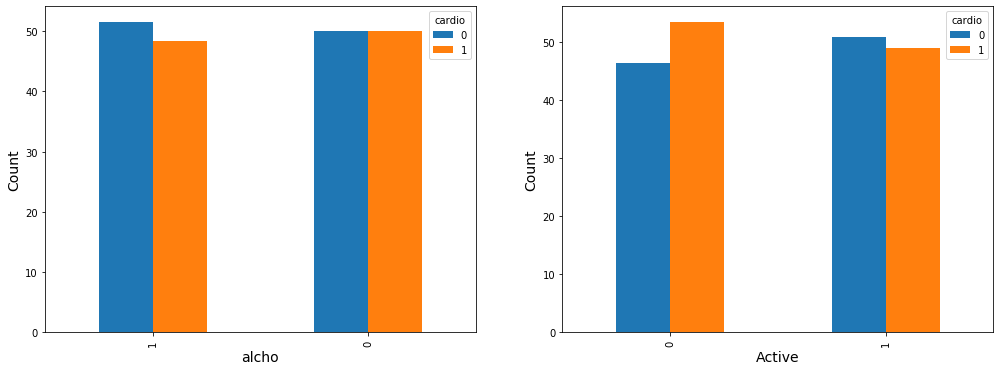

In [19]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_alco.div(table_alco.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("alcho",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_active.div(table_active.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Active",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

##### Information from the Graph:                           

1) Equal no of genders are suffering from cardiovascular disease.                 
2) We notice, that cholestrol of '3', i.e. the ones with high above normal cholestrol are more likely to have cardio problems.

3) We notice, that glucose of '3', i.e. the ones with high above normal glucose are more likely to have cardio problems.  
4) Person who smokes are  likely prone to have cardio problems.           
5) Person who alcohol intake are  likely prone to have cardio problems.                       
6) Active people are less likely prone to have cardio problems.                         


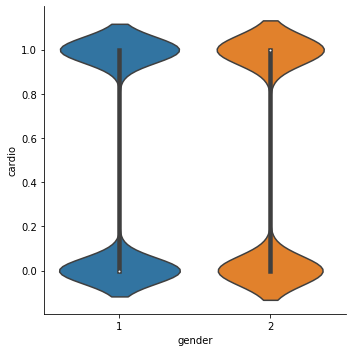

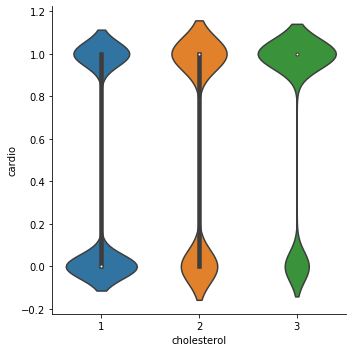

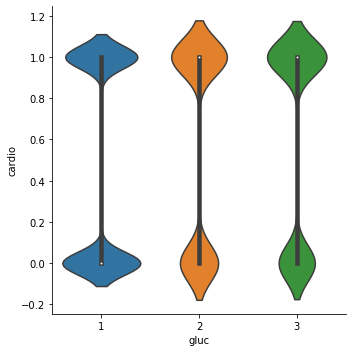

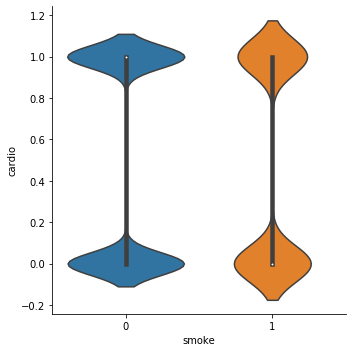

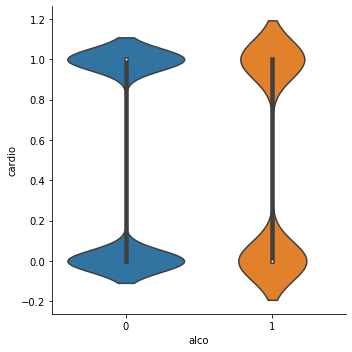

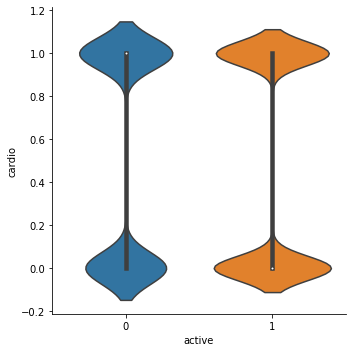

In [20]:
m=df.drop(['age', 'id', 'ap_lo','ap_hi','weight','height','cardio'],axis=1).columns.values
for i in m:
    sns.catplot(x=i, y="cardio", data=df,kind="violin");
    plt.tight_layout()

##### Information from the Graph:                           

1) Equal no of genders are suffering from cardiovascular disease.                 
2) We notice, that cholestrol of '3', i.e. the ones with high above normal cholestrol are more likely to have cardio problems.

3) We notice, that glucose of '3', i.e. the ones with high above normal glucose are more likely to have cardio problems.  
4) Person who smokes are  likely prone to have cardio problems.           
5) Person who alcohol intake are  likely prone to have cardio problems.                       
6) Active people are less likely prone to have cardio problems.                         


### Feature Engineering

In [21]:
#Feature Removal
print(f"Number of columns before deleting: {df.shape[1]}")
del_cols = ['id']
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 13
Number of columns after deleting: 12


In [22]:
dfcholesterolDummies = pd.get_dummies(df['cholesterol'], prefix = 'cholesterol')
dfglucDummies = pd.get_dummies(df['gluc'], prefix = 'gluc')
dfgenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfalcoDummies = pd.get_dummies(df['alco'], prefix = 'alco')
dfsmokeDummies = pd.get_dummies(df['smoke'], prefix = 'smoke')
dfactiveDummies = pd.get_dummies(df['active'], prefix = 'active')


print(dfcholesterolDummies.head(3))
print(dfglucDummies.head(3))
print(dfgenderDummies.head(3))
print(dfalcoDummies.head(3))
print(dfsmokeDummies.head(3))
print(dfactiveDummies.head(3))

   cholesterol_1  cholesterol_2  cholesterol_3
0              0              1              0
1              1              0              0
2              1              0              0
   gluc_1  gluc_2  gluc_3
0       0       1       0
1       1       0       0
2       1       0       0
   gender_1  gender_2
0         1         0
1         1         0
2         1         0
   alco_0  alco_1
0       1       0
1       1       0
2       1       0
   smoke_0  smoke_1
0        1        0
1        1        0
2        1        0
   active_0  active_1
0         0         1
1         0         1
2         0         1


In [23]:
#Dropping a columns
df.drop(['cholesterol','gluc','gender','alco','smoke','active'], axis=1, inplace=True)

df = pd.concat([df, dfcholesterolDummies], axis=1)
df = pd.concat([df, dfglucDummies], axis=1)
df = pd.concat([df, dfgenderDummies], axis=1)
df = pd.concat([df, dfalcoDummies], axis=1)
df = pd.concat([df, dfsmokeDummies], axis=1)
df = pd.concat([df, dfactiveDummies], axis=1)

df

,age,height,weight,ap_hi,ap_lo,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,gender_1,gender_2,alco_0,alco_1,smoke_0,smoke_1,active_0,active_1
0,22469,155,69.0,130,80,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1
1,14648,163,71.0,110,70,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1
2,21901,165,70.0,120,80,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1
3,14549,165,85.0,120,80,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
4,23393,155,62.0,120,80,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,168,76.0,120,80,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1
69297,22601,158,126.0,140,90,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1
69298,19066,183,105.0,180,90,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0
69299,22431,163,72.0,135,80,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0


In [24]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

age              -0.307388
height           -0.634040
weight            1.005120
ap_hi            84.886144
ap_lo            32.101546
cardio            0.001645
cholesterol_1    -1.145180
cholesterol_2     2.120036
cholesterol_3     2.409822
gluc_1           -1.957134
gluc_2            3.250517
gluc_3            3.196172
gender_1         -0.631203
gender_2          0.631203
alco_0           -3.951845
alco_1            3.951845
smoke_0          -2.907579
smoke_1           2.907579
active_0          1.531525
active_1         -1.531525
dtype: float64

In [25]:
#lets remove the skewness
for i in df.drop(['cardio'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])
df.skew()

age             -0.307388
height          -0.037776
weight           0.215584
ap_hi            6.235167
ap_lo            5.540008
cardio           0.001645
cholesterol_1   -1.145180
cholesterol_2    2.120036
cholesterol_3    2.409822
gluc_1          -1.957134
gluc_2           3.250517
gluc_3           3.196172
gender_1        -0.631203
gender_2         0.631203
alco_0          -3.951845
alco_1           3.951845
smoke_0         -2.907579
smoke_1          2.907579
active_0         1.531525
active_1        -1.531525
dtype: float64

In [26]:
# Lets remove outliers in ap_hi and ap_lo
df_clean = df[df['ap_hi'] < 250]  
df_clean = df_clean[df_clean['ap_lo'] < 200]

print(df_clean.shape)


(69293, 20)


In [27]:
# lets check the skewness again after clearing outliers
df_clean.skew()

age             -0.307429
height          -0.037801
weight           0.215635
ap_hi            6.255335
ap_lo            5.539754
cardio           0.001645
cholesterol_1   -1.145179
cholesterol_2    2.120199
cholesterol_3    2.409617
gluc_1          -1.956944
gluc_2           3.250279
gluc_3           3.195936
gender_1        -0.631283
gender_2         0.631283
alco_0          -3.951575
alco_1           3.951575
smoke_0         -2.907355
smoke_1          2.907355
active_0         1.531575
active_1        -1.531575
dtype: float64

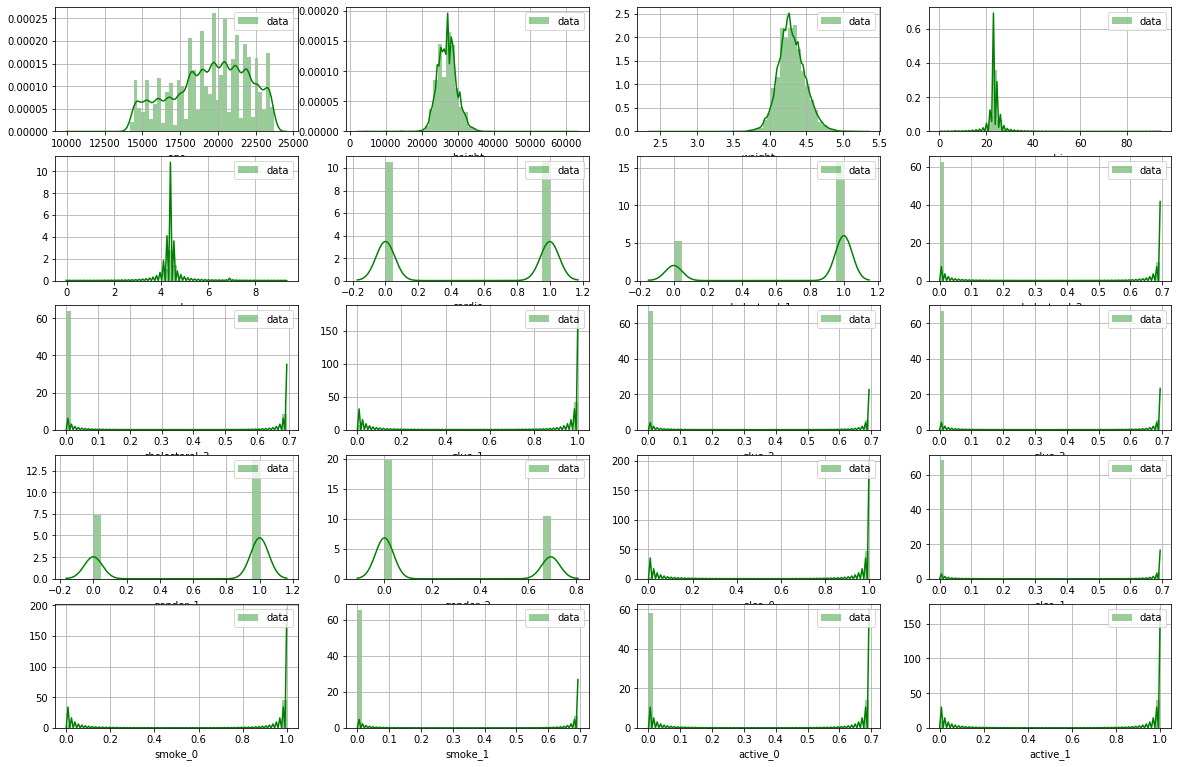

In [29]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_clean.columns.values)):
    plt.subplot(6,4,i+1)
    sns.distplot(df_clean[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

(20.0, 0.0)

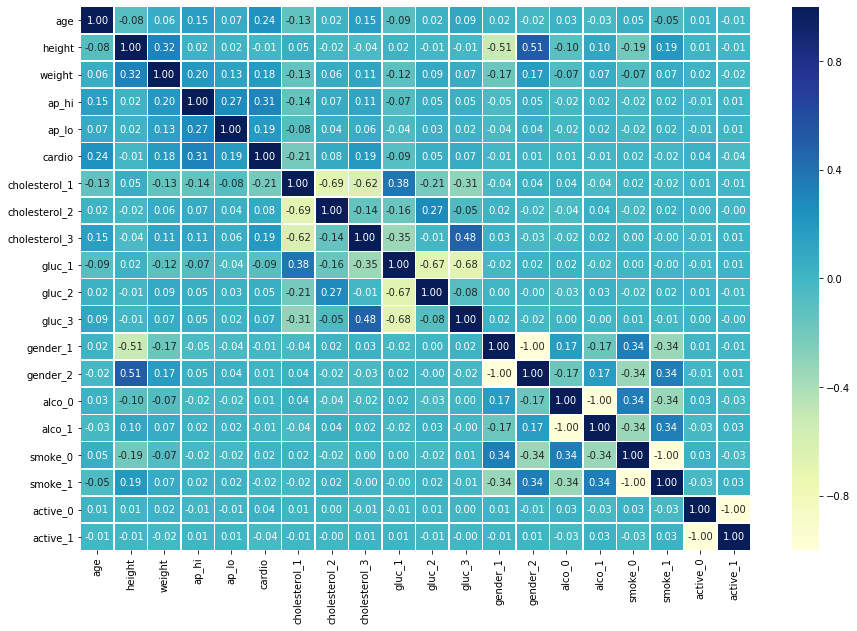

In [30]:
# Plotting Heatmap for Correlation
corr_matrix = df_clean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Modeling


In [31]:
# Split data into X and y
X = df_clean.drop("cardio", axis=1)

y = df_clean["cardio"]

In [32]:
# Independent variables (no target column)
X.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,gender_1,gender_2,alco_0,alco_1,smoke_0,smoke_1,active_0,active_1
0,22469,24025,4.248495,23.767549,4.394449,0,0.693359,0.0,0,0.693359,0.0,1,0.000000,1,0.000000,1,0.000000,0.0,1
1,14648,26569,4.276666,22.179675,4.262680,1,0.000000,0.0,1,0.000000,0.0,1,0.000000,1,0.000000,1,0.000000,0.0,1
2,21901,27225,4.262680,22.999607,4.394449,1,0.000000,0.0,1,0.000000,0.0,1,0.000000,1,0.000000,1,0.000000,0.0,1
3,14549,27225,4.454347,22.999607,4.394449,1,0.000000,0.0,1,0.000000,0.0,0,0.693359,0,0.693359,0,0.693359,0.0,1
4,23393,24025,4.143135,22.999607,4.394449,1,0.000000,0.0,1,0.000000,0.0,1,0.000000,1,0.000000,1,0.000000,0.0,1


In [33]:
# Target variable
y


0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69293, dtype: int64

In [34]:
#checking shape of input variable
X.shape

(69293, 19)

In [35]:
#checking shape of target variable
y.shape

(69293,)

In [36]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,age,height,weight,ap_hi,ap_lo,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,gender_1,gender_2,alco_0,alco_1,smoke_0,smoke_1,active_0,active_1
0,1.216099,-1.148183,-0.294967,0.176880,-0.128450,-1.724898,2.517390,-0.360944,-2.377510,3.533235,-0.287111,0.732995,-0.732995,0.238655,-0.238655,0.310748,-0.310748,-0.493755,0.493755
1,-1.954049,-0.192779,-0.142278,-0.714818,-0.522550,0.579744,-0.397237,-0.360944,0.420608,-0.283027,-0.287111,0.732995,-0.732995,0.238655,-0.238655,0.310748,-0.310748,-0.493755,0.493755
2,0.985867,0.053583,-0.218085,-0.254371,-0.128450,0.579744,-0.397237,-0.360944,0.420608,-0.283027,-0.287111,0.732995,-0.732995,0.238655,-0.238655,0.310748,-0.310748,-0.493755,0.493755
3,-1.994177,0.053583,0.820772,-0.254371,-0.128450,0.579744,-0.397237,-0.360944,0.420608,-0.283027,-0.287111,-1.364265,1.364265,-4.190145,4.190145,-3.218041,3.218041,-0.493755,0.493755
4,1.590631,-1.148183,-0.866032,-0.254371,-0.128450,0.579744,-0.397237,-0.360944,0.420608,-0.283027,-0.287111,0.732995,-0.732995,0.238655,-0.238655,0.310748,-0.310748,-0.493755,0.493755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69288,-0.092737,0.428759,0.221624,-0.254371,-0.128450,0.579744,-0.397237,-0.360944,0.420608,-0.283027,-0.287111,-1.364265,1.364265,0.238655,-0.238655,-3.218041,3.218041,-0.493755,0.493755
69289,1.269603,-0.795540,2.933743,0.582710,0.219714,-1.724898,2.517390,-0.360944,-2.377510,3.533235,-0.287111,0.732995,-0.732995,0.238655,-0.238655,0.310748,-0.310748,-0.493755,0.493755
69290,-0.163266,2.406040,1.954070,2.005803,0.219714,-1.724898,-0.397237,2.770510,0.420608,-0.283027,-0.287111,-1.364265,1.364265,-4.190145,4.190145,0.310748,-0.310748,2.025297,-2.025297
69291,1.200696,-0.192779,-0.067517,0.382766,-0.128450,0.579744,-0.397237,-0.360944,-2.377510,3.533235,-0.287111,0.732995,-0.732995,0.238655,-0.238655,0.310748,-0.310748,2.025297,-2.025297


In [37]:

#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** Random Forest *****************************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Max Accuracy Score corresponding to Random State  99 is: 0.7192438126848979


Learning Score :  0.9997835263556663
Accuracy Score :  0.720831228804387
Cross Val Score :  0.7124383933764796
roc auc score :  0.7208272158280842


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      6935
           1     

Max Accuracy Score corresponding to Random State  61 is: 0.7289847752363086


Learning Score :  0.7114767110437638
Accuracy Score :  0.7196045890756909
Cross Val Score :  0.7203902372382672
roc auc score :  0.7195351154172795


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.74      6935
           1       0.77      0.63      0.69      6924

    accuracy                           0.72     13859
   macro avg       0.73      0.72      0.72     13859
weighted avg       0.73      0.72      0.72     13859



Confusion Matrix:
 [[5597 1338]
 [2548 4376]]







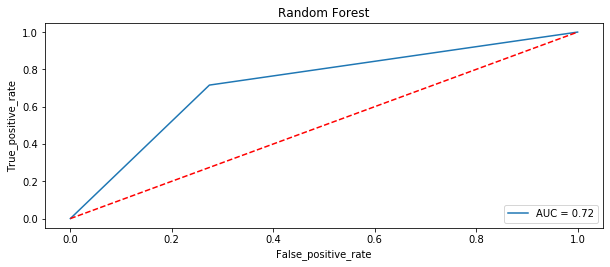

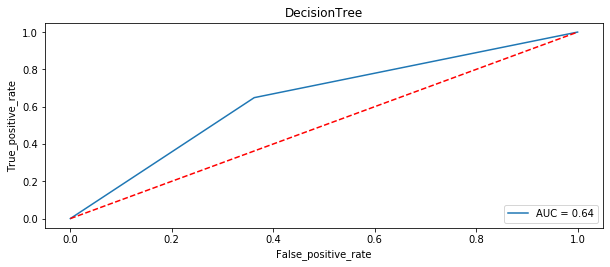

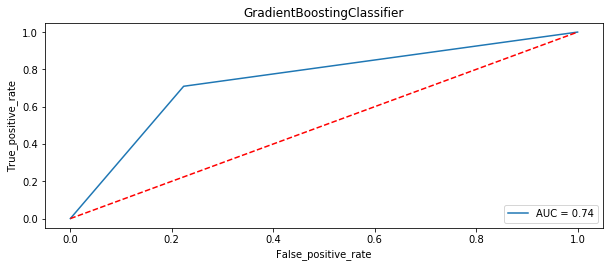

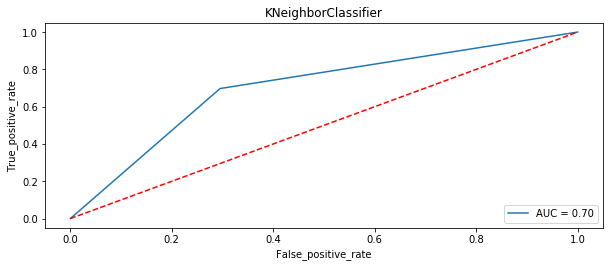

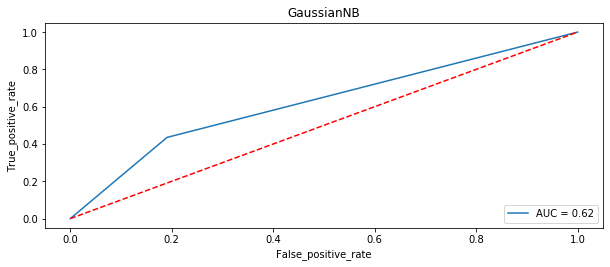

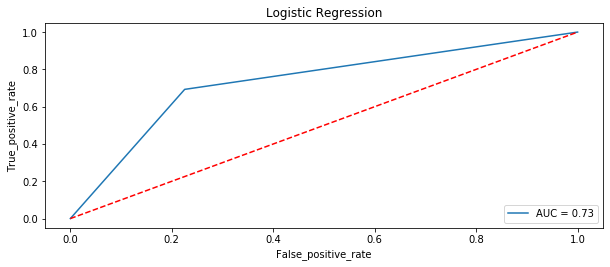

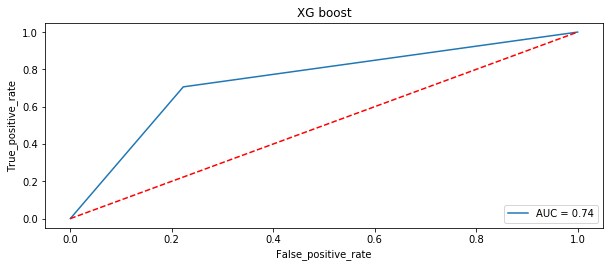

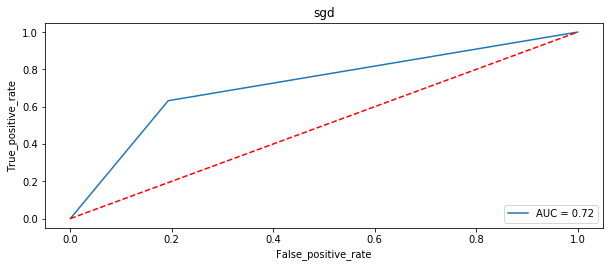

In [38]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
#models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier()))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
models.append(('sgd',SGDClassifier()))


#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [39]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,Random Forest,99.9784,72.0831,71.2438,72.0827
1,DecisionTree,99.9765,64.2976,63.2849,64.298
2,GradientBoostingClassifier,73.8013,74.3055,73.5399,74.3028
3,KNeighborClassifier,78.3148,70.1061,69.4659,70.1058
4,GaussianNB,61.5398,62.2484,61.4045,62.2335
5,Logistic Regression,72.3852,73.3747,72.5932,73.3715
6,XG boost,76.4044,74.1828,73.27,74.18
7,sgd,71.1477,71.9605,72.039,71.9535


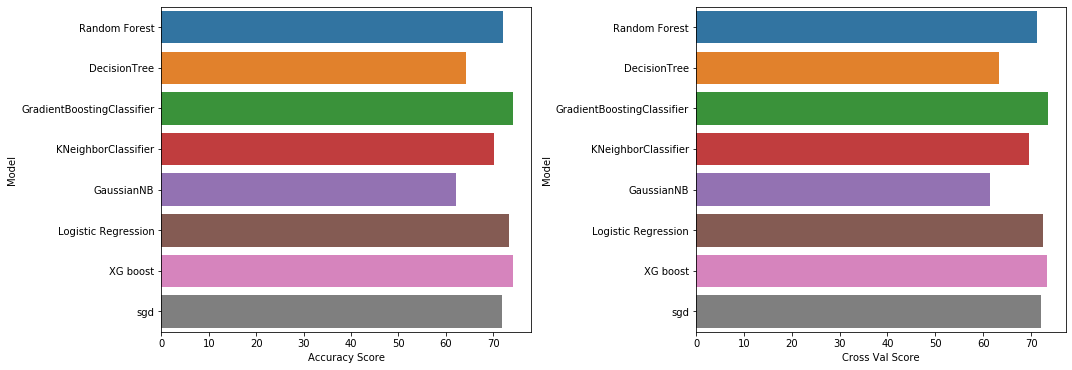

In [40]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Val Score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [41]:
#Define a function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

## Tuning a model with GridSearchCV

In [42]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,refit=True,n_jobs=-1)
    clf.fit(x,y)
    print(clf.best_params_)
    print(clf.best_score_)

In [43]:
#.........Grid Search for LogisticRegression......
lg=LogisticRegression()
parameters={"C": np.logspace(-4, 4, 20),"solver": ["liblinear"],'penalty' : ['l1', 'l2']}
grid_cv(lg,parameters,'accuracy')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   54.1s finished


{'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'liblinear'}
0.7261195338146302


In [44]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C= 0.012742749857031334, solver='liblinear',penalty= 'l2')
max_acc_score(clfR,x,y)

Max Accuracy Score corresponding to Random State  94 is: 0.7336027130384588




94

In [45]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 400,600],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'accuracy')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 66.4min finished


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
0.7349371118692455


In [47]:
 #checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=200,max_depth=10, min_samples_leaf= 2, max_features= 'sqrt',min_samples_split=4)
max_acc_score(rf,x,y)

Max Accuracy Score corresponding to Random State  94 is: 0.7412511725232701




94

In [48]:
#.......Grid Search for XGBClassifier.....
xgb=XGBClassifier()
parameters={'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.1,0.08], #so called `eta` value
              'max_depth': range(3,10,2),
              'min_child_weight': range(1,6,2),
              'silent': [1,0],
              'subsample': [0.5,0.6,0.7,0.8,0.9,1],
              'colsample_bytree': [0.7],
              'n_estimators': [5,20,50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
grid_cv(xgb,parameters,'accuracy')

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 54.9min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 61.7min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.5}
0.7370873912259702


In [50]:
xgb=XGBClassifier(colsample_bytree=0.7,learning_rate=0.1,max_depth= 7,min_child_weight= 3,missing=-999,n_estimators= 50,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.5)
max_acc_score(xgb,x,y)

Max Accuracy Score corresponding to Random State  94 is: 0.7435601414243452




94

In [57]:
#.......Grid Search for GradientBoostingClassifier......
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters,'accuracy')

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.4min finished


{'learning_rate': 0.1, 'n_estimators': 100}
0.7356587052635584


In [58]:
#checking accuracy score using best parameters which calculated from gridsearchCV
gb=GradientBoostingClassifier(learning_rate= 0.1,n_estimators=100)
print("GradientBoostingClassifier accuracy score:",max_acc_score(gb,x,y))

Max Accuracy Score corresponding to Random State  94 is: 0.743055054477235


GradientBoostingClassifier accuracy score: 94


In [52]:
#.......Grid Search for KNeighborsClassifier.......
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,20),'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']}
grid_cv(knn,parameters,'accuracy')

Fitting 5 folds for each of 76 candidates, totalling 380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed: 26.4min finished


{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}
0.7226703626053173


In [53]:
 #checking accuracy score  using best parameters which calculated from gridsearchCV
knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 18, weights= 'uniform')
print("KNeighborsClassifier accuracy score:",max_acc_score(knn,x,y))

Max Accuracy Score corresponding to Random State  56 is: 0.7299227938523704


KNeighborsClassifier accuracy score: 56


In [54]:
#.......Grid Search for SGDClassifier.......
sgd=SGDClassifier()
parameters = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}
grid_cv(sgd,parameters,'accuracy')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.1s


{'alpha': 0.1, 'loss': 'log', 'penalty': 'none'}
0.7266679482932507


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   20.5s finished


In [55]:
 #checking accuracy score  using best parameters which calculated from gridsearchCV
sgd=SGDClassifier(alpha= 0.1, loss= 'log', penalty= 'none')
print("SGDClassifier accuracy score:",max_acc_score(sgd,x,y))

Max Accuracy Score corresponding to Random State  94 is: 0.7338191788729346


SGDClassifier accuracy score: 94


## After all this process conclusion is that GradientBoostingClassifier  and XGBClassifier performing well as compared to other models .
#### Lets compare them on the basis of accuracy,precision ,recall,f1 score and auc_roc score

In [59]:
#lets make our GradientBoostingClassifier as final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 94,test_size=0.20,stratify=y)
gbc=GradientBoostingClassifier(learning_rate= 0.1,n_estimators=100)
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
evaluate_preds(y_test,predgbc)

Acc: 74.31%
Precision: 0.76
Recall: 0.71
F1 score: 0.73


{'accuracy': 0.74, 'precision': 0.76, 'recall': 0.71, 'f1': 0.73}

In [73]:
#lets make our XGBClassifier as final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 94,test_size=0.20,stratify=y)
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.1,max_depth= 7,min_child_weight= 3,missing=-999,n_estimators= 50,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.5)
xg.fit(x_train,y_train)
predgxg=xg.predict(x_test)
evaluate_preds(y_test,predgxg)

Acc: 74.36%
Precision: 0.76
Recall: 0.70
F1 score: 0.73


{'accuracy': 0.74, 'precision': 0.76, 'recall': 0.7, 'f1': 0.73}

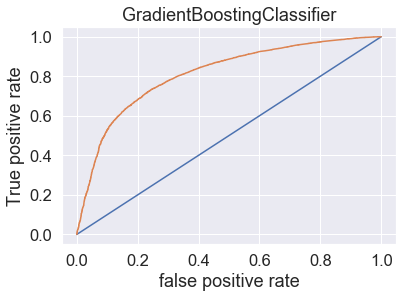

roc_auc_score =  0.8109295400843934


In [74]:
# Make predictions with probabilities
y_probs = gbc.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

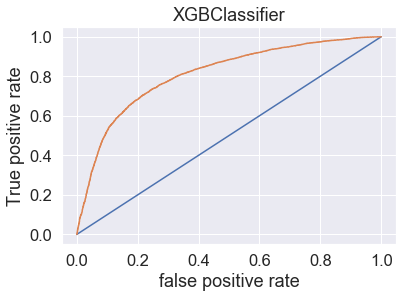

roc_auc_score =  0.8102870614607791


In [83]:
# Make predictions with probabilities
y_probs = xg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('XGBClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

## From above model I can conclude that GradientBoostingClassifier performs well as compared to other models

[[5386 1549]
 [2012 4912]]


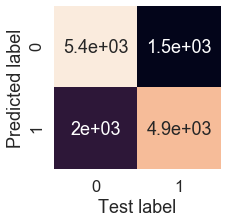

In [65]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predgbc):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predgbc),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predgbc)
#lets printed confusion_matrix
print(confusion_matrix(y_test, predgbc))

In [76]:
# Printing predicted values 
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predgbc
test
# On the lest side values are those fields which are taken by machine for test...

,cardio,Predicted values
4160,0,0
65143,0,0
43874,0,0
35487,0,0
24165,1,1
...,...,...
53486,0,0
56955,0,1
44773,0,1
60804,0,0


In [77]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predgbc)
df1.to_csv('Assignment_5_Cardiovascular_Disease_Detection.csv')

## Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Cardio) 

In [78]:
# Find feature importance of our best model
gbc.feature_importances_

array([1.26052116e-01, 2.54428279e-03, 1.83506445e-02, 7.36145013e-01,
       2.34591560e-02, 2.00979442e-02, 6.64603688e-04, 5.62691791e-02,
       1.49762913e-03, 4.23841793e-04, 3.34387567e-03, 5.54277656e-04,
       6.96122009e-04, 4.72644457e-04, 6.84309451e-04, 1.17155885e-03,
       1.19930268e-03, 4.22172560e-03, 2.15177357e-03])

In [79]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=28):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()



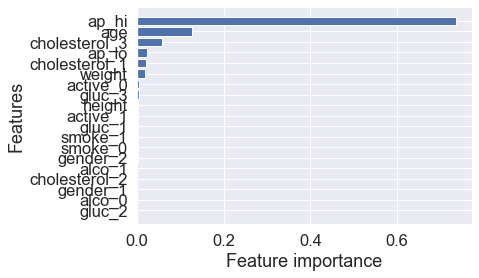

In [80]:
#bar plot of important features 
plot_features(x_train.columns, gbc.feature_importances_)
#Looks like Contract contribute the most.

In [81]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(gbc,'Assignment_5_Cardiovascular_Disease_Detection.pkl')

['Assignment_5_Cardiovascular_Disease_Detection.pkl']

In [82]:
#read the file using joblib
gbc_from_joblib=joblib.load('Assignment_5_Cardiovascular_Disease_Detection.pkl')
joblib_y_preds = gbc_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 74.31%
Precision: 0.76
Recall: 0.71
F1 score: 0.73


{'accuracy': 0.74, 'precision': 0.76, 'recall': 0.71, 'f1': 0.73}

##### Conclusion:

* Equal no of genders are suffering from cardiovascular disease.                 
* We notice, that cholestrol of '3', i.e. the ones with high above normal cholestrol are more likely to have cardio problems.
* We notice, that glucose of '3', i.e. the ones with high above normal glucose are more likely to have cardio problems.  
* Person who smokes are  likely prone to have cardio problems.           
* Person who alcohol intake are  likely prone to have cardio problems.                       
* Active people are less likely prone to have cardio problems.                         
 

##### Steps Followed:

* Data Acquisition.
* Data Preprocessing.
* Best parameters are found using Gridsearch cv and applied to models.
* Best parameters are applied to each models and machine is trained for each models to find Best Accuracy and f1 Score.
* AUC ROC Curves are made for each model.
* A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
* GradientBoostingClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
* Predicted values are saved in Assignment_5_Cardiovascular_Disease_Detection.csv file.
* Pickle file is named with Assignment_5_Cardiovascular_Disease_Detection.pkl 